### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

In [60]:
import pandas as pd
df = pd.read_csv("weather_classification_data.csv")
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [61]:
df.shape

(13200, 11)

In [62]:
df.isna().sum()

temperature             0
humidity                0
wind_speed              0
precipitation (%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility (km)         0
location                0
weather_type            0
dtype: int64

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

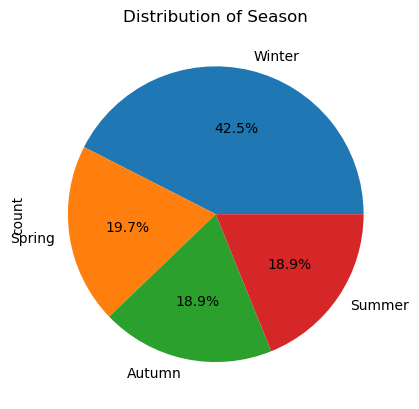

In [64]:
df['season'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Season')
plt.show()

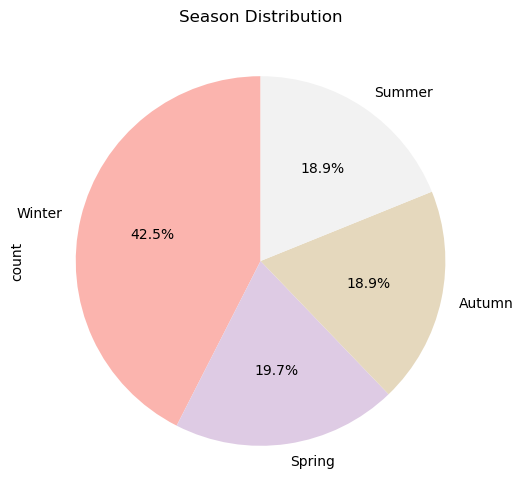

In [65]:
# Visualize season using a pie chart.
season_counts = df['season'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
season_counts.plot.pie(autopct='%1.1f%%', startangle=90, colormap='Pastel1')
plt.title('Season Distribution')
#plt.ylabel('')  # Hide y-label
#plt.axis('equal')
plt.show()

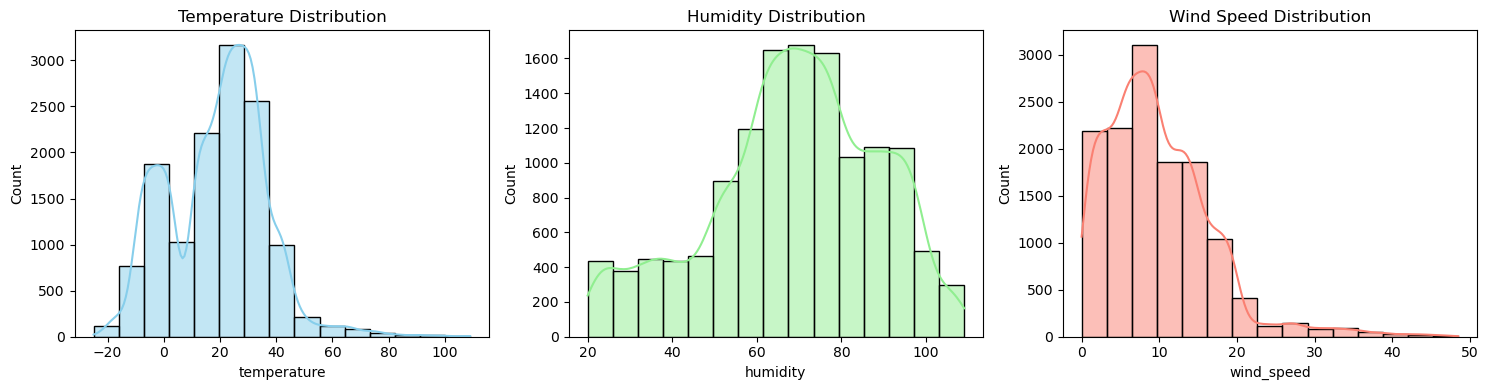

In [66]:
# Visualize temperature, humidity, and wind_speed using histograms.

plt.figure(figsize=(15, 4))

# Temperature
plt.subplot(1, 3, 1)
sns.histplot(df['temperature'], bins=15, color='skyblue', kde=True)
plt.title('Temperature Distribution')

# Humidity
plt.subplot(1, 3, 2)
sns.histplot(df['humidity'], bins=15, color='lightgreen', kde=True)
plt.title('Humidity Distribution')

# Wind Speed
plt.subplot(1, 3, 3)
sns.histplot(df['wind_speed'], bins=15, color='salmon', kde=True)
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

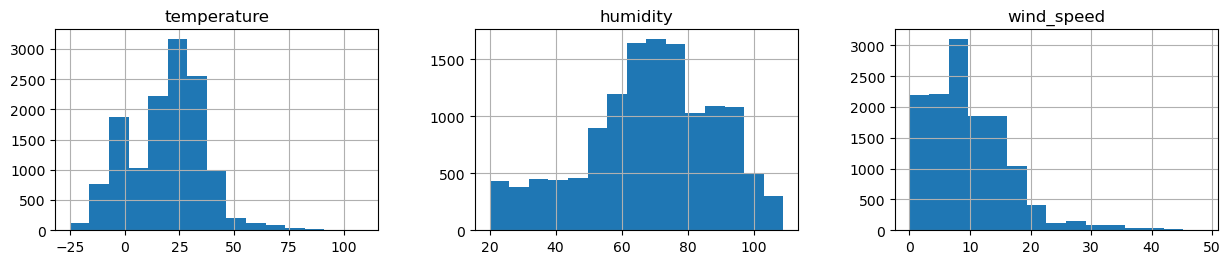

In [67]:
df[['temperature', 'humidity', 'wind_speed']].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

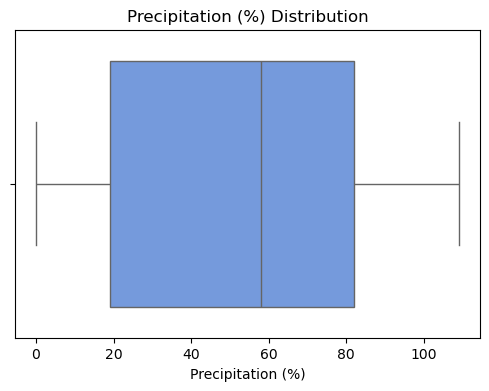

In [68]:
# Visualize precipitation (%) using a box plot.
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['precipitation (%)'], color='cornflowerblue')
plt.title('Precipitation (%) Distribution')
plt.xlabel('Precipitation (%)')
plt.show()

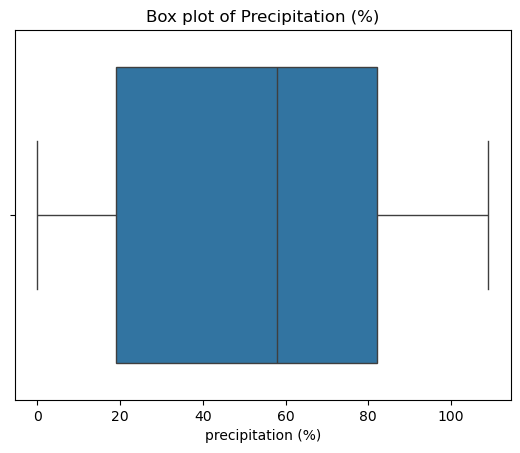

In [69]:
sns.boxplot(x='precipitation (%)', data=df)
plt.title('Box plot of Precipitation (%)')
plt.show()

## Data Transformation

In [71]:
# Encode cloud_cover, location and season using one-hot encoding.

x = ["cloud_cover","location","season"]

for i in x:
    print(i)
    print(df[i].unique())

cloud_cover
['partly cloudy' 'clear' 'overcast' 'cloudy']
location
['inland' 'mountain' 'coastal']
season
['Winter' 'Spring' 'Summer' 'Autumn']


In [72]:
df = pd.get_dummies(df, columns=["cloud_cover","location","season"], drop_first=True)

In [107]:
# Scale the numerical features 
# (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) 
# using StandardScaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [109]:
# Display the first few rows of the updated dataset.
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


In [111]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)', 'weather_type',
       'cloud_cover_cloudy', 'cloud_cover_overcast',
       'cloud_cover_partly cloudy', 'location_inland', 'location_mountain',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [119]:
from sklearn.model_selection import train_test_split
X = df.drop('weather_type', axis=1)
y = df['weather_type']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training Using SVM with Linear Kernel

In [127]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

svc_linear.score(X_test, y_test)

0.8845959595959596

In [131]:
# Make predictions on the test set
y_pred = svc_linear.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [133]:
#confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[806  82  28  39]
 [ 49 852  67  14]
 [ 26  12 974  21]
 [ 57  29  33 871]]


# Model Training Using SVM with RBF Kernel

In [135]:
# Train SVM with RBF kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

svc_rbf.score(X_test, y_test)

0.9055555555555556

In [137]:
# Make predictions on the test set
y_pred = svc_rbf.predict(X_test)

In [145]:
# classification report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [147]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[843  64  24  24]
 [ 54 891  13  24]
 [ 30  14 968  21]
 [ 48  28  30 884]]


## Hyperparameters in SVM

In [151]:
# Train the SVM model with hyperparameters
svm_model = SVC(C=0.5, gamma='auto', kernel='rbf', degree=2)


svm_model.fit(X_train, y_train)


svm_model.score(X_test, y_test)

0.898989898989899

In [153]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [157]:
#classification report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



In [159]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[833  62  36  24]
 [ 50 882  31  19]
 [ 29  10 973  21]
 [ 46  30  42 872]]


## Implementing Sklearn Pipeline

In [164]:
from sklearn.pipeline import Pipeline

# Create a pipeline with two steps: scaling and SVM with RBF kernel
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=0.5, gamma='auto', kernel='rbf'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline on the test data
y_pred = pipeline.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

      Cloudy       0.86      0.87      0.87       955
       Rainy       0.89      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.96      0.88      0.92       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



In [168]:
# Print the confusion matrix for the pipeline model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[834  67  37  17]
 [ 49 886  38   9]
 [ 31  13 975  14]
 [ 55  28  36 871]]


## Conclusion

SVM with Linear Kernel with Accuracy: 0.8845

SVM with RBF Kernel with Accuracy: 0.91

SVM Model with hyper parameters with Accuracy : 0.90

The RBF kernel SVM achieves the highest accuracy, making it the best choice for weather type classification.